<a href="https://colab.research.google.com/github/Pritam84/Car-Evaluation-Classification/blob/main/Car_Evaluation_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Python Project on Car Evaluation Classification**

#**Overview of the project**


*   The dataset have choosen for this particular project is a **labelled** dataset. So, the project will be Supervised Learning.

*   The dataset contains information about **differenrt attributes of a car** which are observed if someone try to evaluate a car in terms of it's **acceptability**.
*   So, the dataset contains the different categories of different attributes of car. Based on some feature attributes we will need to **classify** the acceptability of that car.


*   So, basically the project is going to be a **supervised **learning classification problem.

*   We will try to build such machine learning models to classify the acceptability precisely.
*   The final aim to achieve a machine leaning model which will be performing best to classify acceptability of a car on this particular dataset. Which can be helpful for the car seller to make their business decisions.

[Dataset source:]
(https://archive.ics.uci.edu/ml/datasets/Car+Evaluation)







In [ ]:
#importing drive to access the dataset from google drive local storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importing Necessary Libraries**

In [ ]:
#data manipulation libraries
import numpy as np
import pandas as pd
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # for checking the model accuracy
#To plot the graph embedded in the notebook
%matplotlib inline

#**Loading the dataset**

1.   Now, we will be loading the dataset using Pandas **Data frame** object.
2.   The dataset file format is **Comma Separated Value**(CSV)



In [ ]:
car = pd.read_csv("/content/drive/MyDrive/Python_Final_Project/car_data_folder/car.csv",header=0)
car.head()

,Buying Price,Maintenance,Doors,Persons,Lug_boot,Safety,Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
car.tail()

,Buying Price,Maintenance,Doors,Persons,Lug_boot,Safety,Acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood




*   After loading the dataset, by using **head() and tail()** we see a glimpse of the first and last few samples of the data.




#**Data preprocessing**

*   In this section we will be looking for the **noise** in the dataset such as any missing values or null values are present in the datset.
*   If there is such any noise in the dataset we will be fixing those issues according to the convinient.



In [ ]:
#Checking missing values in the dataset
car.isnull().sum()

Buying Price     0
Maintenance      0
Doors            0
Persons          0
Lug_boot         0
Safety           0
Acceptability    0
dtype: int64



*   We are using **isnull().sum()** for checking the missing values in the dataset.
*   As, it can be seen clearly from above form every attributes the sum of null is '0'. So, that indicates there is no missing value present in any columns.

*   So, dataset is in good state for further operation.






#**Exploratory Data Analysis (EDA)**

*   In this section, we will be discovering the dataset in depth. Also observe each and every attribures of the dataset.
*   We will find the categories present for each attribute, exploring their nature.

*   We will be also trying to distinguish the feature attributes and target attribute for classification model building.
*   If necessary, we will try to manipulate the data for further operation.





In [ ]:
#for exploring all the attributes of the dataset
car.keys()

Index(['Buying Price', 'Maintenance', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Acceptability'],
      dtype='object')



*   So, there are 7 attributes present in the dataset.




In [ ]:
#printing the information of car dataset
print(car.info)

<bound method DataFrame.info of      Buying Price Maintenance  Doors Persons Lug_boot Safety Acceptability
0           vhigh       vhigh      2       2    small    low         unacc
1           vhigh       vhigh      2       2    small    med         unacc
2           vhigh       vhigh      2       2    small   high         unacc
3           vhigh       vhigh      2       2      med    low         unacc
4           vhigh       vhigh      2       2      med    med         unacc
...           ...         ...    ...     ...      ...    ...           ...
1723          low         low  5more    more      med    med          good
1724          low         low  5more    more      med   high         vgood
1725          low         low  5more    more      big    low         unacc
1726          low         low  5more    more      big    med          good
1727          low         low  5more    more      big   high         vgood

[1728 rows x 7 columns]>




*   By observing the information of the whole datset it is clear that there are 1727 instances and 7 attribures.
*   Every attributes conatain different categories of data.



In [ ]:
# Renaming the colums according to the convinient
col_names = ['buying_price', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability']

car.columns = col_names
col_names

['buying_price',
 'maintenance',
 'doors',
 'persons',
 'lug_boot',
 'safety',
 'acceptability']

In [ ]:
car.head()

,buying_price,maintenance,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
for col in col_names:
    print(car[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying_price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64




*   From the above part we are seeing the depth information about the dataset. It is showing differnt attributes have their own different unique categories.
*   First of all there is **Buying Price** of the car which has** 4 **different categories(vhigh means price is very high, there are 432 instances of it),(high for high price, there are 432 instances of it),(med means medium price range, there are 432 instances of it),(low simply means car price is low, there are 432 instances of it).

*   Secondly, there **Maintenance** attribute which basically means after buying a car how much it will cost a person to maintain a car. Again there are different categories of values (vhigh means maintaining cost is very high, there are 432 instances of it),(high for high maintainance cost, there are 432 instances of it),(med means medium maintaining cost, there are 432 instances of it),(low simply means maintainance cost is less, there are 432 instances of it).
*   After that, there is **Door** attribute which menas how many doors a car will have. Here also, different numbers of doors can be possible for cars. a car may caonatins 2 doors, 3 doors, 4 doors or there could be 5 doors or even more than that. Cars with 2 doors have 432 instances, cars with 3 doors have 432 instances, cars with 4 doors have 432 instances, cars with 5 or more doors have 432 instances.

*   Next attribute is **persosns** which menas for how many persons a car can give space. There are also some categories which are car has space for 2 persons along with 576 instances, car can provide space for 4 persons along with 576 instances and last category is car has the space for more than 4 persons along with the same number of instances which was the number for 2 and 4 persons space.
*   Comming to the another attribute which is **Lug Boot** of the car. This attribute basically means how much materials or items we can keep in the lug boot of a car which is usually situated at the back side of a car. Here are **3** caregories for lung boot. First one is small lug boot which menas there is not enough facilty to keep many items in the lug boot and this have 576 instances, then there is med that menas medium size lug boot which will allow car owner to place more items than to a small lung boot and the instances number is as same as the small lug boot. Finally there is big lug boot which will provide the luxury to keep many items in the lug boot of the car. Here the instance number is 576.

*   There is another attribute named **safety**. This simply means how safe a car is, how preventive a car is from accident. Which is a very imporatnt attribute in the dataset. Safety has** 3 **categories. Low safety, med menas medium safety, high safety. Each of them conatins 576 instances.
*   Finally there is a attribute named **acceptability**. This is basically the target or class attribute. This haa some categories in it. In terms of acceptability of a car based on the other giver feature attributes(buying_price, maintenance, doors, persons, lug_boot, safety) the acceptability can be classified as unacc(unacceptable), acc(acceptable), good, vgood(very good). These categories of acceptability have intance number respectively 1210, 384, 69, 69.

***So, after analyzing the dataset and it's all attributes finally it is clear that we need to classify the acceptability of the car based on the other given feature attributes (buying_price, maintenance, doors, persons, lug_boot, safety).So, acceptability is the target or class attribute that we will nedd to classify.***









#**Graphical Visualization of the attributes of the datset**

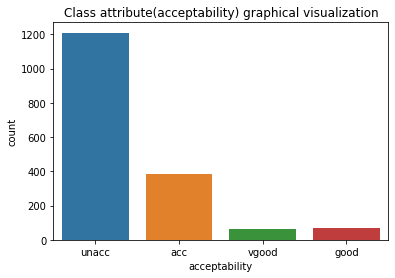

In [ ]:
# visualizing  the acceptability attribute and it's categories
sns.countplot(x='acceptability', data=car)
plt.title("Class attribute(acceptability) graphical visualization");

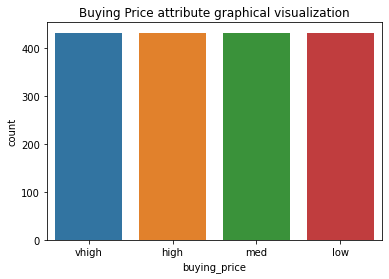

In [ ]:
# visualizing  the buying price attribute and it's categories
sns.countplot(x='buying_price', data=car)
plt.title("Buying Price attribute graphical visualization");

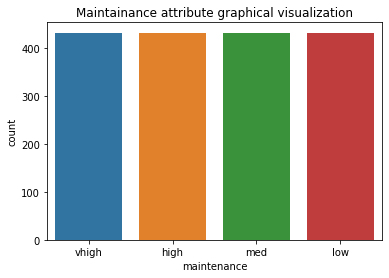

In [ ]:
# visualizing  the maintainance attribute and it's categories
sns.countplot(x='maintenance', data=car)
plt.title("Maintainance attribute graphical visualization");

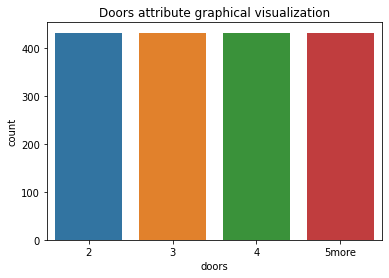

In [ ]:
# visualizing  the doors attribute and it's categories
sns.countplot(x='doors', data=car)
plt.title("Doors attribute graphical visualization");

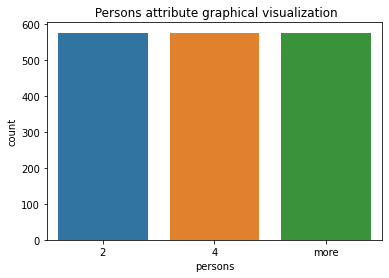

In [ ]:
# visualizing  the persons attribute and it's categories
sns.countplot(x='persons', data=car)
plt.title(" Persons attribute graphical visualization");

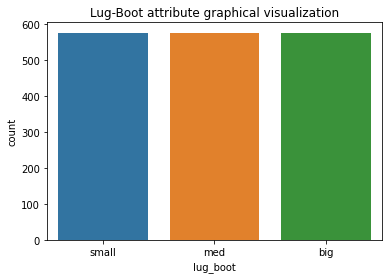

In [ ]:
# visualizing  the lung boot attribute and it's categories
sns.countplot(x='lug_boot', data=car)
plt.title("Lug-Boot attribute graphical visualization");

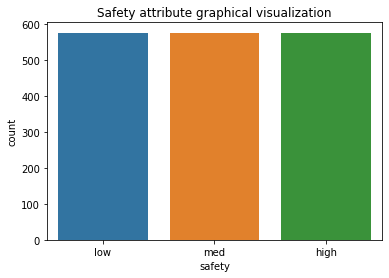

In [ ]:
# visualizing  the safety attribute and it's categories
sns.countplot(x='safety', data=car)
plt.title("Safety attribute graphical visualization");

#**Separating the data set into Feature attributes and target attributes**

In [ ]:
feature = car.drop(['acceptability'], axis=1)

target = car['acceptability']



*   Here, we are separating the **feature attributes(feature matrix**) from the **target** or class attribute 'acceptability'.
*   So, that later on we can can classify the target attribute based on the data of feature attributes.



In [ ]:
feature.head()

,buying_price,maintenance,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med




*   Here are the separated feature attributes dataset or we can call the **feature matrix**. 


In [ ]:
target.tail()

1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: acceptability, dtype: object



*   Here is the separated target attributes along with it's differnt classes.




#**Feature Engineering(Selection of the best possible feature attributes to classify the target attribute.)**



*   In this section, we will be analyzing the feature attributes along with the target attribute in such a way that so that we can identify, which feature has the more **impact** on the target attribute in terms of classify more accurately.
*   With the analyzing and visualization we will be selecting the features for the final model building.


*   Since, the dataset conatains more categorical values it will be better to analyze and visualize the dataset with **stripplot** as stripplot is handy for visualizing categorical data.





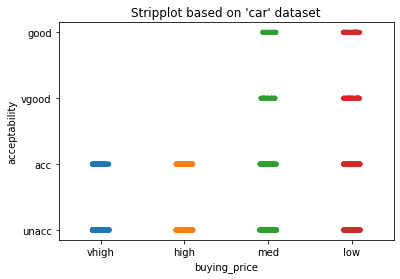

In [ ]:
#visualyzing and analyzing the impact of buying price on acceptability
sns.stripplot(x='buying_price', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

Here we can see that, when the buying price is **very high** the acceptability of a car is **unacceptable**. Then a car is unacepatble as well as acceptable when the buying price is high. But, in terms of meduium and low buying price a car is most likely acceptable that menas vgood class as well as acceptable which indicates good and sometimes unacceptable. So, oveall scenario indicates that the buying price has a good impact on acceptability.

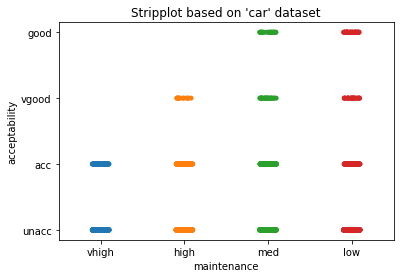

In [ ]:
#visualyzing and analyzing the impact of maitainance cost on acceptability
sns.stripplot(x='maintenance', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

Here, when the maintainance cost is **very high** the car seems to be **unacceptable**. Not even very good or good. But when the maitainance is high the car sometimes very good for acceptable but not regularly acceptable. Then, when it comes to medium and low maintainance cost a car seems to be very mush acceptable regularly acceptable. Even unacceptable which indicates it is based upon the choice of customer. Again, this maintainance feature looks like has a vital impact on the acceptability of a car.

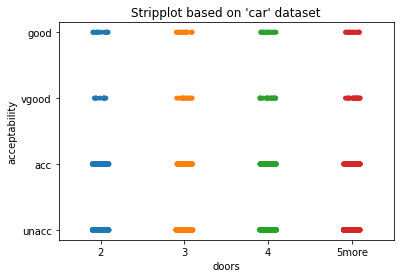

In [ ]:
#visualyzing and analyzing the impact of number of doors on acceptability
sns.stripplot(x='doors', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

Here, we can see that for every categories of doors, a car is unacceptable, acceptable at the same time in almost **equal rate**. So, that's not giving us a clear picture that the door numbers of car really have a impact on acceptability.

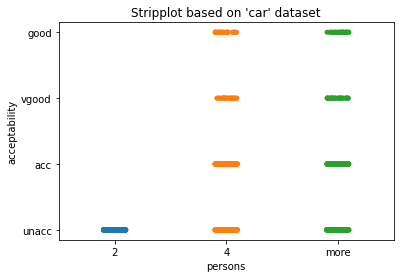

In [ ]:
#visualyzing and analyzing the impact of persons space in a car on acceptability
sns.stripplot(x='persons', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

Here, we can clearly see that only 2 persosns containing car is **directly unacceptable** and there is no other option. But when it come to a car which can give space for 4 persons or more persons the car looks like acceptable in a good rate. Again unacceptability at this condition depends on the choice of customer. So, this feature has great impact on acceptability.

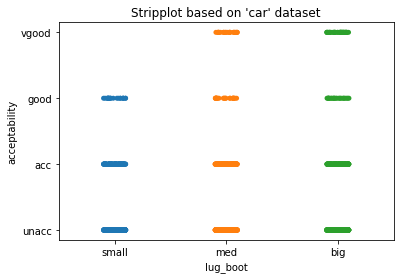

In [ ]:
#visualyzing and analyzing the impact of lug boot on acceptability
sns.stripplot(x='lug_boot', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

In terms of lug boot, when lug boot size is small the car acceptability shows unacceptable but at the same time shows  good. That is kind of contradiction. But it is natural to see that when lug boot size is medium or big a car is strongly acceptable and other options are also avaialbale. This feature has not that much impact on acceptability but sometimes it can make the differences of choice.

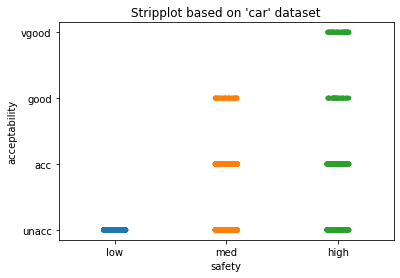

In [ ]:
#visualyzing and analyzing the impact of safety on acceptability
sns.stripplot(x='safety', y='acceptability', data=car)
plt.title("Stripplot based on 'car' dataset");

This safety feature has the **most impact** on acceptability which is clearly visilble from the above strippllot. The plotting show that, when the safety of a car is **low the car is unacceptable** straigh away. Even medium level of safety of a car is not very good. Only when the safety of a car is high only then a car is acceptable as well as good. Other two options acceptable and unacceptable even when the car has high safety is actually depends on the choice of the customer.

#**Overall Evaluation of all Feature Attributes and Selection of the Final Attributes for Model Buildig**



*   From the stripplot analysis and visualization the decision is made that the numbers of **doors** of a car does not have that much impact on the acceptability of a car.
*   So, doors feature attribute will be **removed** from the feature matrix since, other feature attributes has good impact or minimal impact on the acceptability of a car those will remain.



In [ ]:
#dropping doors feature after feature selection
feature = car.drop(['doors','acceptability'], axis=1)

In [ ]:
feature.head()

,buying_price,maintenance,persons,lug_boot,safety
0,vhigh,vhigh,2,small,low
1,vhigh,vhigh,2,small,med
2,vhigh,vhigh,2,small,high
3,vhigh,vhigh,2,med,low
4,vhigh,vhigh,2,med,med


In [ ]:
target.tail()

1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: acceptability, dtype: object

#**Train Test Splitting**

*   In this section we will be spliiting out main data set into **two** parts.
*   We will separate majority percentage of data for **training** our model.


*   Then we will separate the rest for **testing** our model.






In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.30,
                                                    random_state=24)

X_train.shape, X_test.shape

((1209, 5), (519, 5))



*   We have separated **70% **of our instances for training our model.
*   And rest of the **30%** will be using for testing the model.


*   For the 70% of training data we have got 1209 intances.
*   For 30% of the test data we have got 519 instances.

*   On both the occasion of training and testing set we have now **5** fetaure attributes since doors is no longer present in the feature matrix after feature selection.








In [ ]:
y_train.shape, y_test.shape

((1209,), (519,))

Here, the target atribute's shape after splitting is shown. Which basically shows that, 1209 intances for training traget attribute and 519 for testing purpose. It has only one column which is the target attribute column itself.

#**Bilding Classification Model for car Evaluatuion Dataset**

In [ ]:
pip install category_encoders

In [ ]:
import pandas.util.testing as tm

In [ ]:
# Encode Categorical
import category_encoders as ce

In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying_price', 'maintenance', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying_price,maintenance,persons,lug_boot,safety
1667,1,1,1,1,1
1654,1,1,2,2,2
508,2,2,1,3,2
202,3,3,3,3,2
1493,1,3,2,2,1


In [ ]:
X_test.head()

,buying_price,maintenance,persons,lug_boot,safety
489,2,2,2,3,3
408,3,1,2,3,3
1226,4,1,3,1,1
414,3,1,3,1,3
788,2,1,2,3,1


#**Building SVM Model**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.8439
----------------------------------


Here SVM is doing pretty well on the car evaluation dataset.

#**Now Building The Decision Tree Model**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.9518
---------------------------------




*   Here it is clearly visible that Decision Tree Model is doning **far better** than the previous SVM model.




#**K-Nearest Neighbour (KNN) Model Building**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9056
----------------------------------




*   In the case of, KNN it is doing a very handy job.
*   KNN model is performing **better** than the SVM model but at the same time the model is lack of accuracy at almost **6%** comparing with Decision Tree Model.



#**Naive Bayes Model Building**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.5645
---------------------------------




*   The accuracy of Naive Bayes Model is **very poor** comparing to others previous model that we have built.




#**Comapring Between All The Built Models Accuracy And Pick The Best Model For The Car Evaluation Dataset**

In [ ]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
  print(s)

The accuracy scores of different Models:
----------------------------------------
('DT', 0.9518)
('KNN', 0.9056)
('SVM', 0.8439)
('NB', 0.5645)


*Here, we can see the accuracy of different models that we have built for the Car Evaluation Datset.*


*   Different models are showing **different** accuracies.
*   Some models have done great job on the dataset to classify the target variable while other models did not have that much accuracy.


*   Four models **(SVM, DT, KNN, NB)** were built and implemented in this particular project to claasify the Acceptability of a car based on different features associated with cars.
*   From the numerical data of accuracies it is clear that, Naive Bayes model has the most **less** accuracy. So, we can not pick Naive Bayes model for classify the Acceptability of a car based on the particular dataset that we have used.


*   Now, comming to other two models KNN and SVM. Their accuracy is way better than the Naive Bayes model while they are giving accuracy around **90% and 84%** respectively. So, that indicates they are quite good model for classify the Accepatbility more accurately.
*   We have already seen that, KNN and SVM provided good accuracies. But the best accuracy gain was with the Decision Tree model where accuracy was **95%**. That sounds good and it will provide the **best outcome** in terms of classify the Acceptability of the car for this particular dataset. Which will have a great impact on evaluating a car whether the car is very good or good in terms of acceptability otherwise simply the car can be acceptable or not.

***So, the final picked model is Decision Tree for this particular project and dataset. Hopefully, with the help of the finally picked classifier or model Acceptability of a car can be claasified accurately which will help the Car Seller to make important business desicion. Whether they can tune their car features for gaining higher sale than their previous time.***









